# Fashion MNIST 

In [5]:
# Importing modules 
import tensorflow as tf 
from tensorflow import keras 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [6]:
# check tensorflow version
print(tf.__version__)

2.9.1


In [7]:
# import the Fashion MNIST dataset 

60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images

In [8]:
# splitting the dataset into training and testing sets 
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


Loading the dataset returns four NumPy arrays:

* The ```train_images``` and ```train_labels``` arrays are the training set—the data the model uses to learn.
* The model is tested against the *test set*, the ```test_images```, and ```test_labels``` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9. 

Since the ```class_names``` is not stored with the dataset, we store them in an array 

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Getting a few important statistical measures from the dataset

In [9]:
train_images.shape

(60000, 28, 28)

In [10]:
len(train_labels)

60000

In [12]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [13]:
test_images.shape

(10000, 28, 28)

In [14]:
len(test_labels)

10000

In [15]:
#look at one pixel 
train_images[0,23,23]

194

Our pixel values are between 0 and 255, 0 being black and 255 being white. This means we have a grayscale image as there are no color channels.

In [16]:
#look at the first ten training labels 
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

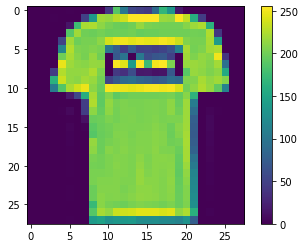

In [17]:
# plotting one of the images 
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

## Data Preprocessing

The last step before creating our model is to preprocess our data. This simply means applying some prior transformations to our data before feeding it the model. In this case we will simply scale all our greyscale pixel values (0-255) to be between 0 and 1. We can do this by dividing each value in the training and testing sets by 255.0. We do this because smaller values will make it easier for the model to process our values.



In [18]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

## Building the model

In [19]:
#Sequential refers to the simplest type of NN, where information goes from left to right sequentially
#Flatten is a type of layer which will turn the 28x28 matrix into a single layered array 
#Dense is a type of layer which implies that the layer is fully connected to the NN
model = keras.Sequential([          
          keras.layers.Flatten(input_shape=(28,28)), #input layer (1)
          keras.layers.Dense(128, activation='relu'),  #first hidden layer (2)
          keras.layers.Dense(10, activation='softmax') # output layer (3)

          #There are 10 neurons here because we need as many neurons as we have classes to predict
])

**Layer 1:** This is our input layer and it will conist of 784 neurons. We use the flatten layer with an input shape of (28,28) to denote that our input should come in in that shape. The flatten means that our layer will reshape the shape (28,28) array into a vector of 784 neurons so that each pixel will be associated with one neuron.

**Layer 2:** This is our first and only hidden layer. The *dense* denotes that this layer will be fully connected and each neuron from the previous layer connects to each neuron of this layer. It has 128 neurons and uses the rectify linear unit activation function.

**Layer 3:** This is our output later and is also a dense layer. It has 10 neurons that we will look at to determine our models output. Each neuron represnts the probabillity of a given image being one of the 10 different classes. The activation function *softmax* is used on this layer to calculate a probabillity distribution for each class. This means the value of any neuron in this layer will be between 0 and 1, where 1 represents a high probabillity of the image being that class.

In [ ]:
# Compiling the model

In [21]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy'] 
)

# Training the model

In [22]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5005 - accuracy: 0.8233
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3754 - accuracy: 0.8648
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3372 - accuracy: 0.8766
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3145 - accuracy: 0.8855
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2944 - accuracy: 0.8920
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2812 - accuracy: 0.8961
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2674 - accuracy: 0.9021
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2597 - accuracy: 0.9046
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2488 - accuracy: 0.9070
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.238

##Evaluating the Model
Now it's time to test/evaluate the model. We can do this quite easily using another builtin method from keras.

The *verbose* argument is defined from the keras documentation as:
"verbose: 0 or 1. Verbosity mode. 0 = silent, 1 = progress bar."

In [23]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3321 - accuracy: 0.8826
Test accuracy: 0.8826000094413757
